In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [12]:
rfm = pd.read_csv("C:\\Aalesh and Mandar\\Datasets\\rfm_data_customer.csv")

In [13]:
rfm.head()

,customer_id,revenue,most_recent_visit,number_of_orders,recency_days
0,22086,777,2006-05-14,9,232
1,2290,1555,2006-09-08,16,115
2,26377,336,2006-11-19,5,43
3,24650,1189,2006-10-29,12,64
4,12883,1229,2006-12-09,12,23


In [14]:
rfm.drop(["customer_id"], axis = 1, inplace = True)

In [15]:
rfm.drop(["most_recent_visit"], axis = 1, inplace = True)

In [16]:
rfm.head()

,revenue,number_of_orders,recency_days
0,777,9,232
1,1555,16,115
2,336,5,43
3,1189,12,64
4,1229,12,23


In [18]:
scalar = StandardScaler()

In [20]:
scaled_rfm = scalar.fit_transform(rfm)
scaled_rfm

array([[-0.46459975, -0.26567604,  0.38587806],
       [ 1.77410983,  1.97275169, -0.50658145],
       [-1.73358552, -1.54477759, -1.05578731],
       ...,
       [ 0.22312723, -0.26567604, -0.20909495],
       [-0.7494741 , -0.90522681,  0.10364727],
       [ 1.67051916,  1.01342552, -0.52183717]])

In [22]:
km = KMeans(n_clusters=4, random_state = 100)
km.fit(scaled_rfm)

KMeans(n_clusters=4, random_state=100)

In [23]:
labels = km.predict(scaled_rfm)

In [24]:
rfm["Cluster"] = labels

In [33]:
rfm.head(30)

,revenue,number_of_orders,recency_days,Cluster
0,777,9,232,1
1,1555,16,115,0
2,336,5,43,1
3,1189,12,64,3
4,1229,12,23,3
5,929,11,72,3
6,1569,17,112,0
7,778,11,142,3
8,641,9,43,1
9,970,10,131,3


In [27]:
rfm.groupby("Cluster").mean()

,revenue,number_of_orders,recency_days
Cluster,,,
0,1451.454114,14.350413,131.660296
1,627.224118,7.088421,144.518617
2,709.494548,7.491782,427.695037
3,1012.350631,10.611994,133.380649


In [28]:
km.inertia_

37406.51109121197

In [29]:
wss = []
for i in np.arange(2,10):
    km=KMeans(n_clusters = i, random_state=2022)
    km.fit(scaled_rfm)
    wss.append(km.inertia_)

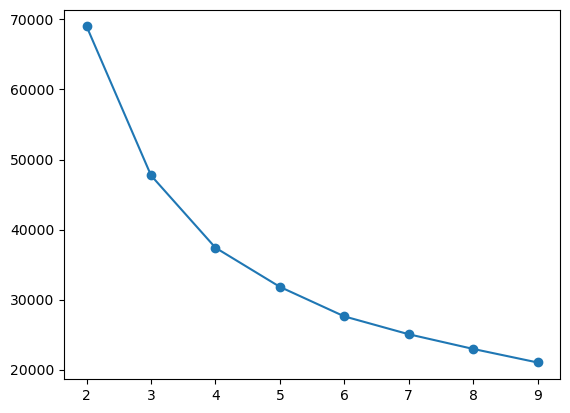

In [30]:
plt.scatter(np.arange(2,10), wss)
plt.plot(np.arange(2,10), wss)

In [31]:
sil = []
for i in np.arange(2,10):
    km=KMeans(n_clusters = i, random_state=2022)
    km.fit(scaled_rfm)
    labels = km.predict(scaled_rfm)
    sil.append(silhouette_score(scaled_rfm, labels))

In [32]:
ks = np.arange(2,10)
i_max = np.argmax(sil)
best_k = ks[i_max]
print("Best K = ",best_k)

Best K =  3
